In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import sys

path = os.getcwd().split(os.sep + 'GUI')[0]
if path not in sys.path:
    sys.path.append(path)

from neurolib.models.aln import ALNModel
from neurolib.utils import plotFunctions as plotFunc
from neurolib.utils import costFunctions as cost
import neurolib.dashboard.functions as functions
import neurolib.dashboard.data as data
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

In [115]:
aln = ALNModel()

aln.params.sigma_ou = 0.
aln.params.mue_ext_mean = 0.
aln.params.mui_ext_mean = 0.
aln.params.ext_exc_current = 0.
aln.params.ext_inh_current = 0.

down = []
up = []
lc = []

In [116]:
step = 0.005
range_e = np.arange(0.0, 1., step)
range_i = np.arange(0., 1., step)

aln.params['duration'] = 1000.
control0 = aln.getZeroControl()

int_start = 5000

for e in range_e:
    for i in range_i:
        #print('---------', e, i)        
        aln.params.mue_ext_mean = e * 5.
        aln.params.mui_ext_mean = i * 5.

        aln.run(control=control0)    
        #plt.plot(aln.t[int_start:], aln.rates_exc[0,int_start:])
        #plt.ylim(0,20)
        #plt.xlim(100,2000)
        #plt.show()
        
        if np.amax(aln.rates_exc[0,int_start:]) - np.amin(aln.rates_exc[0,int_start:]) < 1.3:
            if np.amax(aln.rates_exc[0,int_start:]) < 3.:
                down.append( [e,i] )
            elif np.amax(aln.rates_exc[0,int_start:]) > 5.:
                up.append( [e,i] )
            else:
                print("error")
                print(np.amax(aln.rates_exc[0,int_start:]))
        else:
            lc.append( [e,i] )

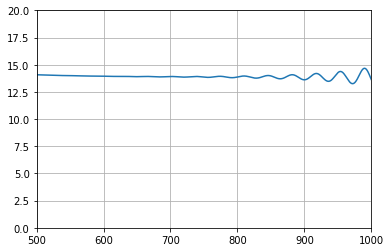

In [108]:
e,i = 0.665, 0.015

aln.params['duration'] = 1000.
control0 = aln.getZeroControl()

aln.params.mue_ext_mean = e * 5.
aln.params.mui_ext_mean = i * 5.

aln.run(control=control0)    
plt.plot(aln.t[int_start:], aln.rates_exc[0,int_start:])
plt.ylim(0,20)
plt.xlim(500,1000)
plt.show()


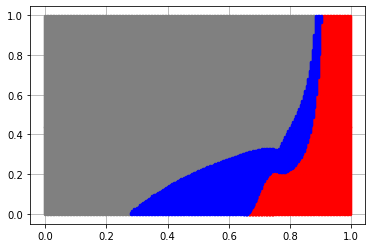

In [111]:
for x in down:
    plt.plot(x[0], x[1], linestyle=None, color='grey', marker='.', markersize=5)
for x in up:
    plt.plot(x[0], x[1], linestyle=None, color='red', marker='.', markersize=5)
for x in lc:
    plt.plot(x[0], x[1], linestyle=None, color='blue', marker='.', markersize=5)
#plt.xlim(0.65,0.75)
#plt.ylim(0,0.1)
plt.show()

[0.655, 0.305] [0.66, 0.0]
[0.66, 0.305] [0.665, 0.01]
[0.665, 0.31] [0.67, 0.02]
[0.67, 0.31] [0.675, 0.035]
[0.675, 0.31] [0.68, 0.045]
[0.68, 0.315] [0.685, 0.065]
[0.685, 0.315] [0.6900000000000001, 0.08]
[0.6900000000000001, 0.32] [0.6950000000000001, 0.1]
[0.6950000000000001, 0.32] [0.7000000000000001, 0.115]


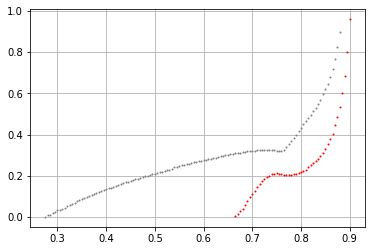

In [117]:
boundary_down = []

for e in range_e:
    for d in range(len(lc)-1):
        if lc[d][0] == e:
            if lc[d+1][0] > e:
                if lc[d][1] == range_i[-1]:
                    break
                boundary_down.append(lc[d])
                if 0.65 < e and e < 0.7:
                    print(lc[d], lc[d+1])
                break
                                
boundary_up = []

for e in range_e:
    for d in range(len(up)-1):
        if up[d][0] == e:
            if up[d+1][0] > e:
                if up[d][1] == range_i[-1]:
                    break
                boundary_up.append(up[d])
                break
    
for x in boundary_down:
    plt.plot(x[0], x[1], linestyle=None, color='grey', marker='.', markersize=2)
for x in boundary_up:
    plt.plot(x[0], x[1], linestyle=None, color='red', marker='.', markersize=2) 
#plt.xlim(0.65,0.75)
#plt.ylim(0,0.1)
plt.show()

In [119]:
file = open('boundary_adaptation.pickle',"wb")
pickle.dump([boundary_down, boundary_up], file)